In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
karnataka = pd.read_csv('Karnataka, BBMP deaths data - Sheet1.csv')

states_data = pd.read_csv('state_wise_daily.csv')

In [23]:
karnataka['Month'] =karnataka['Month'].apply(lambda x: x[0:3]) 

In [310]:
df = pd.melt(karnataka.iloc[:,0:6], id_vars='Month', value_vars=['2015', '2016', '2016', '2017','2018', '2019'])
df.columns = ['Month', 'year', 'count']

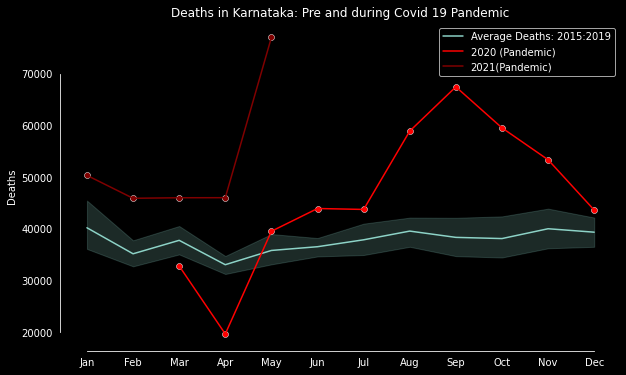

In [311]:
fig = plt.figure(figsize = (10,6))

sns_plot = sns.lineplot(data = df, x = 'Month', y = 'count' )
sns.lineplot(data=karnataka.iloc[2:], x="Month", y="2020*", color= 'red')
sns.lineplot(data=karnataka, x="Month", y="2021*", color= 'maroon')
plt.legend(['Average Deaths: 2015:2019','2020 (Pandemic)', '2021(Pandemic)'])
sns.scatterplot(data=karnataka.iloc[2:], x="Month", y="2020*", color= 'red')
sns.scatterplot(data=karnataka, x="Month", y="2021*", color= 'maroon')

plt.title('Deaths in Karnataka: Pre and during Covid 19 Pandemic')
sns.despine(trim=True, offset=2)
plt.style.use('dark_background')
plt.grid(b=None)
plt.ylabel('Deaths')
plt.xlabel('')
plt.xticks(rotation = 0)
sns_plot.figure.savefig('a.jpg')

In [149]:
karnataka_covid = states_data.loc[states_data['Status'] == 'Deceased',['Date', 'Date_YMD', 'Status','KA']]

from datetime import datetime as dt
karnataka_covid['Date_YMD'] = karnataka_covid['Date_YMD'].apply(lambda x: '-'.join(x.split('-')[0:2]))
karnataka_covid['Date_YMD'] = karnataka_covid['Date_YMD'].apply(lambda x: dt.strptime(x,'%Y-%m'))

In [295]:
temp  = karnataka_covid.groupby('Date_YMD')['KA'].sum().reset_index()
karnataka['month_val'] = karnataka.index + 1
df = pd.melt(karnataka, id_vars=['Month','month_val','mean_15_19','std_15_19'], value_vars=['2020*', '2021*'])
df['date'] = df.apply(lambda x: "{}{}".format(x['variable'], x['month_val']), axis =1)
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%Y*%m'))
df['excess_death'] = df['value'] - df['mean_15_19']
temp.columns =['date', 'covid_death']
temp = temp.merge(df[['date', 'excess_death','std_15_19']], on ='date', how ='left')
temp

,date,covid_death,excess_death,std_15_19
0,2020-03-01,3,-5531.2,4183.496588
1,2020-04-01,19,-13553.6,2767.398923
2,2020-05-01,29,3412.4,4436.738081
3,2020-06-01,197,7150.2,2659.479780
4,2020-07-01,2073,5409.4,4403.419387
5,2020-08-01,3388,19303.0,4266.238976
6,2020-09-01,3162,28615.2,5122.524592
7,2020-10-01,2304,20512.6,5537.890375
8,2020-11-01,610,12700.0,6011.175883
9,2020-12-01,312,3677.4,4357.862699


In [296]:
temp['date'] = temp['date'].apply(lambda x: '-'.join(str(x).split('-')[0:2]))

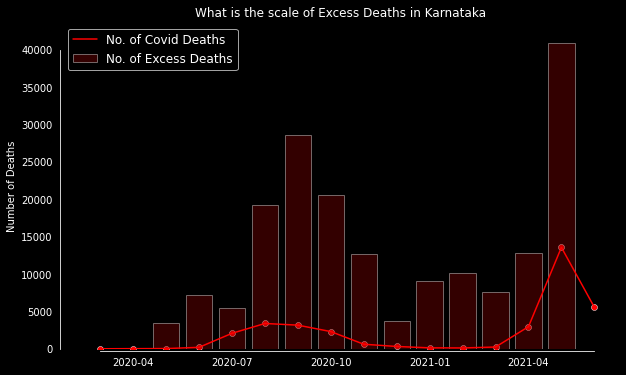

In [316]:
plt.figure(figsize = (10,6))
plt.bar(temp["date"],temp["excess_death"],color = 'maroon',alpha = 0.4)
sns.lineplot(data= temp, x = 'date', y ='covid_death', color = 'red')
plt.legend(['No. of Covid Deaths','No. of Excess Deaths'],fontsize = 'large')
sns.scatterplot(data= temp, x = 'date', y ='covid_death', color = 'red')
plt.ylim(0,)
plt.xlabel('')
sns.despine(trim=True, offset=2)
plt.xticks(['2020-04','2020-07', '2020-10', '2021-01','2021-04'])
plt.title('What is the scale of Excess Deaths in Karnataka')
plt.style.use('dark_background')
plt.grid(b=None)
plt.ylabel('Number of Deaths')
plt.savefig('b.jpg')